# **ÖĞRENCİ DEPRESYONU VERİ SETİ İNCELEMESİ**
Bu veri seti, öğrencilerin ruh sağlığı ve ilgili faktörler hakkında detaylı bilgiler içerir.Öğrencilerde depresyon belirtilerini ve bunlara neden olabilecek faktörleri incelemek için hazırlanmıştır. Veriler demografik ayrıntıları, akademik ve iş ile ilgili baskıları, yaşam tarzı alışkanlıklarını ve belirli ruh sağlığı göstergelerini içerir. Araştırmacılar, hassas bilgilerin etik bir şekilde işlenmesini sağlarken, depresyon için risk faktörlerini belirlemek ve erken müdahale stratejileri geliştirmek için bu veri setini kullanabilirler.

# **Veri Seti Özellikleri:**(18)

**id**: Veri kümesindeki her öğrenci kaydına atanan benzersiz bir tanımlayıcı.

**Cinsiyet**: Öğrencinin cinsiyeti (örneğin, Erkek, Kadın, Diğer). Bu, ruh sağlığındaki cinsiyete özgü eğilimleri analiz etmeye yardımcı olur.

**Yaş**: Öğrencinin yıl cinsinden yaşı.

**Şehir**: Öğrencinin ikamet ettiği şehir veya bölge, analiz için coğrafi bağlam sağlar.

**Meslek:** Öğrencinin hangi alanda eğitim aldığı ya da hangi mesleğe hazırlandığı bilgisini vererek, akademik ya da mesleki kaynaklı stres düzeylerini anlamaya yardımcı olmak.

**Akademik Baskı**: Öğrencinin akademik ortamlarda karşılaştığı baskı seviyesini gösteren bir ölçü. Bu, sınavlardan, ödevlerden ve genel akademik beklentilerden kaynaklanan stresi içerebilir.

**İş Baskısı**: Öğrencilerin öğrenimlerinin yanı sıra istihdam edilmeleri durumunda, iş veya iş sorumluluklarıyla ilgili baskının ölçüsü.

**CGPA**: Öğrencinin genel akademik performansını yansıtan kümülatif not ortalaması.

**Çalışma Memnuniyeti**: Öğrencinin çalışmalarından ne kadar memnun olduğunun bir göstergesi olup, ruhsal refahıyla ilişkilendirilebilir.

**İş Memnuniyeti:** Öğrencinin işi veya varsa çalışma ortamıyla ilgili memnuniyetinin ölçüsü.

**Uyku Süresi:** Öğrencinin günde ortalama kaç saat uyuduğu, ruh sağlığı açısından önemli bir faktördür.

**Beslenme Alışkanlıkları:** Öğrencinin yeme düzenlerinin ve beslenme alışkanlıklarının değerlendirilmesi, genel sağlık ve ruh halini etkileme potansiyeline sahiptir.

**Derece:** Öğrencinin takip ettiği akademik derece veya program.

**Hiç intihar düşünceleri yaşadınız mı?:** Öğrencinin daha önce intihar düşüncesi yaşayıp yaşamadığını yansıtan ikili bir gösterge (Evet/Hayır).

**Çalışma/Öğrenme Saatleri:** Öğrencinin günde işe veya çalışmaya ayırdığı ortalama saat sayısı, stres seviyelerini etkileyebilir.

**Finansal Stres:** Finansal kaygılar nedeniyle yaşanan ve ruh sağlığını etkileyebilecek stresin ölçüsü.

**Ailede Ruhsal Hastalık Geçmişi:** Ailede ruhsal hastalık geçmişi olup olmadığını gösterir (Evet/Hayır), bu ruhsal sağlık yatkınlıklarında önemli bir faktör olabilir.

**Depresyon:** Öğrencinin depresyon yaşayıp yaşamadığını gösteren hedef değişken (Evet/Hayır). Bu, analizin birincil odak noktasıdır.

In [81]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import joblib

In [82]:
data = pd.read_csv(r"/content/student_depression_dataset.csv")

In [83]:
target_column = 'Depression'

# Sınıf dağılımını göster
print("🔹 Sınıf Dağılımı:")
print(data[target_column].value_counts())

print("\n🔹 Sınıf Dağılımı (Yüzde):")
print(data[target_column].value_counts(normalize=True) * 100)

🔹 Sınıf Dağılımı:
Depression
1    16336
0    11565
Name: count, dtype: int64

🔹 Sınıf Dağılımı (Yüzde):
Depression
1    58.549873
0    41.450127
Name: proportion, dtype: float64


sınıf dağılımlarına bakıldı ve bir dengesizlik görülmedi.

In [84]:
df = data.copy()

In [85]:
df.head(20)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
5,33,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,'Less than 5 hours',Healthy,PhD,No,4.0,1.0,No,0
6,52,Male,30.0,Thane,Student,3.0,0.0,9.54,4.0,0.0,'7-8 hours',Healthy,BSc,No,1.0,2.0,No,0
7,56,Female,30.0,Chennai,Student,2.0,0.0,8.04,4.0,0.0,'Less than 5 hours',Unhealthy,'Class 12',No,0.0,1.0,Yes,0
8,59,Male,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,'7-8 hours',Moderate,B.Ed,Yes,12.0,3.0,No,1
9,62,Male,31.0,Nashik,Student,2.0,0.0,8.38,3.0,0.0,'Less than 5 hours',Moderate,LLB,Yes,2.0,5.0,No,1


In [86]:
df.tail()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1
27900,140699,Male,27.0,Patna,Student,4.0,0.0,9.24,1.0,0.0,'Less than 5 hours',Healthy,BCA,Yes,2.0,3.0,Yes,1


In [87]:
df.shape

(27901, 18)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [89]:
# Tüm sütunların benzersiz değerlerini yazdır
for column in ['City', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction',
               'Job Satisfaction', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
               'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness',
               'Depression', 'Sleep Duration']:
    print(f"Unique values in '{column}':\n", df[column].unique(), "\n")


Unique values in 'City':
 ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' "'Less Delhi'" 'City'
 '3.0' "'Less than 5 Kalyan'" 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh'
 'Reyansh' 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini'
 'Nandini' 'Khaziabad'] 

Unique values in 'Profession':
 ['Student' "'Civil Engineer'" 'Architect' "'UX/UI Designer'"
 "'Digital Marketer'" "'Content Writer'" "'Educational Consultant'"
 'Teacher' 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist'] 

Unique values in 'Academic Pressure':
 [5. 2. 3. 4. 1. 0.] 

Unique values in 'Work Pressure':
 [0. 5. 2.] 

Unique values in 'CGPA':
 [ 8.97    5.9     7.03    5.59    8.13    5.7     9.54    8.04    9.79
  8.38    6

In [90]:
df.replace('?', np.nan, inplace=True)


'?' ile olan değerleri nan ile doldurduruldu.

In [91]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


Financial Stress değişkeninde eksik veriler görüldü not alındı dolduralacak.

In [92]:
df = df.drop(columns=['id'])
df = df.drop(columns=['Profession'])
df = df.drop(columns=['City'])

Gereksiz etkisi olmayan sütunaları çıkarttım.

In [93]:
df["Have you ever had suicidal thoughts ?"] = df["Have you ever had suicidal thoughts ?"].map({"Yes": 1, "No": 0})
df["Family History of Mental Illness"] = df["Family History of Mental Illness"].map({"Yes": 1, "No": 0})

df["Dietary Habits"] = df["Dietary Habits"].map({"Healthy": 1, "Moderate": 0, "Unhealthy": -1, "Others": -2})

data["Dietary Habits"] = data["Dietary Habits"].map({
    "Healthy": 1,
    "Moderate": 0,
    "Unhealthy": -1,
    "Others": np.nan
})

df["Dietary Habits"].fillna(df["Dietary Habits"].mean(), inplace=True)


<ipython-input-93-a8097664a910>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dietary Habits"].fillna(df["Dietary Habits"].mean(), inplace=True)


Veri Kodlama (Label Encoding / Mapping) işlemleri yapıldı.

Profession değişkeni biraz karışık görünüyor çünkü bazı değerler tek tırnak (') içinde yazılmış. Bu, veri girişinden kaynaklı bir tutarsızlık olabilir. Önce bunları temizleyip sonra encoding yapalım.

In [94]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df["Gender_Male"] = df["Gender_Male"].astype(int)

bool olarak geliyordu manuelden int64 çevirdim modelde sıkıntı yaratmaması için


In [95]:
def convert_sleep_duration(value):
    if pd.isnull(value):
        return None
    value = value.strip("'")  # Tek tırnaklardan kurtul
    if value == 'Less than 5 hours':
        return 0
    elif value == '5-6 hours':
        return 1
    elif value == '7-8 hours':
        return 2
    elif value == 'More than 8 hours':
        return 3
    elif value == 'Others':
        return None  # Şimdilik NaN olarak kalsın
    return None

df['Sleep_Duration_UIQ'] = df['Sleep Duration'].apply(convert_sleep_duration)

# Ortalamayı al, NaN olan yerlere uygula
mean_sleep = df['Sleep_Duration_UIQ'].mean()
df['Sleep_Duration_UIQ'].fillna(mean_sleep, inplace=True)

# Eski sütunu sil
df.drop(columns=['Sleep Duration'], inplace=True)


<ipython-input-95-76c3c23841ba>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep_Duration_UIQ'].fillna(mean_sleep, inplace=True)


"Sleep Duration" (Uyku Süresi) sütununu sayısal forma çevirir, eksik değerleri ortalama ile doldurur ve sonunda orijinal sütunu silerek veriyi model için hazır hale getirildi.

In [96]:
# Önce temizlik: 'Class 12' gibi tırnak işaretlerini kaldıralım
df['Degree'] = df['Degree'].str.replace("'", "").str.strip()

# Sınıflandırma için eşleme sözlüğü
undergraduate_degrees = [
    'B.Pharm', 'BSc', 'BA', 'BCA', 'B.Ed', 'LLB', 'BE',
    'BHM', 'B.Com', 'B.Arch', 'B.Tech', 'BBA'
]

postgraduate_degrees = [
    'M.Tech', 'M.Ed', 'MSc', 'M.Pharm', 'MCA', 'MA',
    'MBA', 'M.Com', 'ME', 'MHM', 'LLM'
]

doctorate_degrees = ['PhD', 'MD']

# Fonksiyonla kategoriye ayıralım
def classify_education(degree):
    if degree in undergraduate_degrees:
        return 'Undergraduate'
    elif degree in postgraduate_degrees:
        return 'Postgraduate'
    elif degree in doctorate_degrees:
        return 'Doctorate'
    else:
        return 'Other'

# Yeni sütunu oluşturalım
df['Education_Level'] = df['Degree'].apply(classify_education)

# Kontrol etmek isterseniz:
print(df['Education_Level'].value_counts())



Education_Level
Undergraduate    12639
Postgraduate      7357
Other             6811
Doctorate         1094
Name: count, dtype: int64


"Degree" (Derece / Mezuniyet tipi) sütununu temizleyip, eğitim seviyesine göre gruplandırır ve yeni bir "Education_Level" sütunu oluşturur.

In [97]:
label_encoder = LabelEncoder()
df['Education_Level'] = label_encoder.fit_transform(df['Education_Level'])
df = df.drop(columns=['Degree'])

Eskiyi silip yeniyi encode ediyorum.

In [98]:
df["Work_Sleep_Balance"] = df["Work/Study Hours"] - df["Sleep_Duration_UIQ"]

Yeni bir özellik oluşturuldu.

Uzun süreli çalışma veya ders + az uyku → yüksek stres, yorgunluk ve düşük yaşam kalitesi.

Uyku ve çalışma dengesizliği → depresyon ve tükenmişlik riskiyle ilişkilidir.

In [99]:
print(df['Financial Stress'].unique())

['1.0' '2.0' '5.0' '3.0' '4.0' nan]


In [100]:
# 'Financial Stress' sütununu sayısal tipe çevir
df['Financial Stress'] = pd.to_numeric(df['Financial Stress'], errors='coerce')

# En çok tekrar eden değeri (mod) bul
most_frequent = df['Financial Stress'].mode()[0]

# NaN olanları bu değerle doldur
df['Financial Stress'].fillna(most_frequent, inplace=True)

# Sonuç kontrolü
print(sorted(df['Financial Stress'].unique()))


[np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0)]


<ipython-input-100-9dc232200a2b>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Financial Stress'].fillna(most_frequent, inplace=True)


Not aldığım eksik verileri doldurdum.

## Veri Görselleştirme:


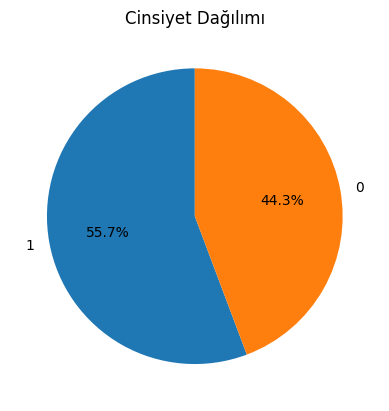

————————————————————————————————————————————————————————————


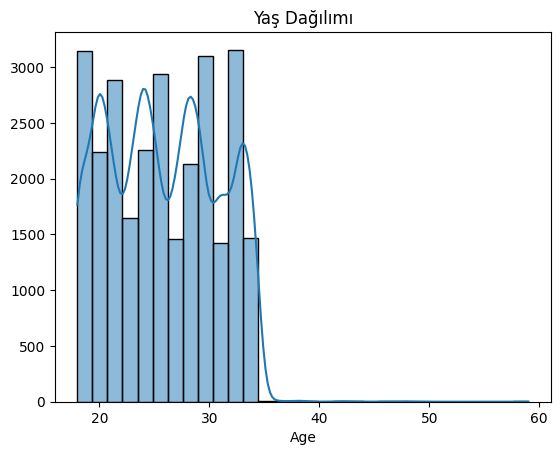

————————————————————————————————————————————————————————————


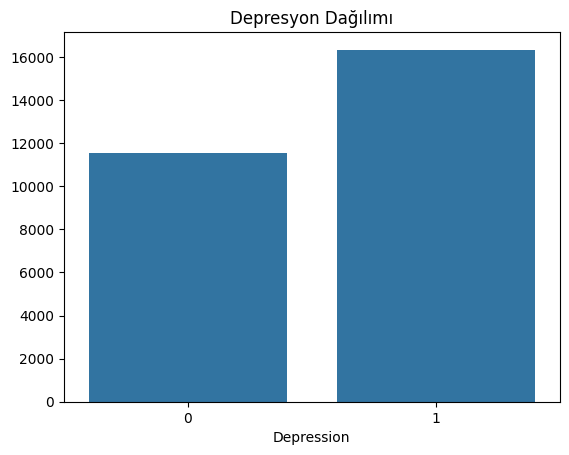

————————————————————————————————————————————————————————————


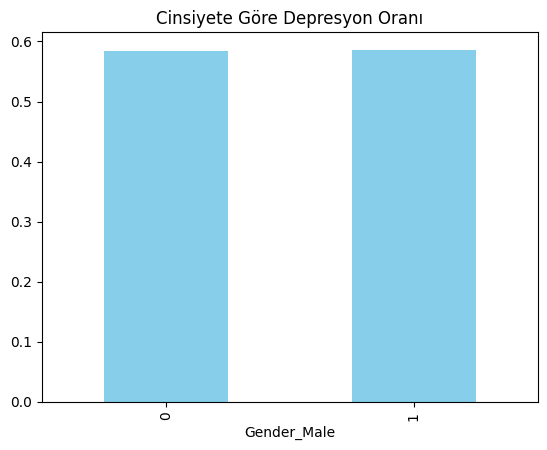

————————————————————————————————————————————————————————————


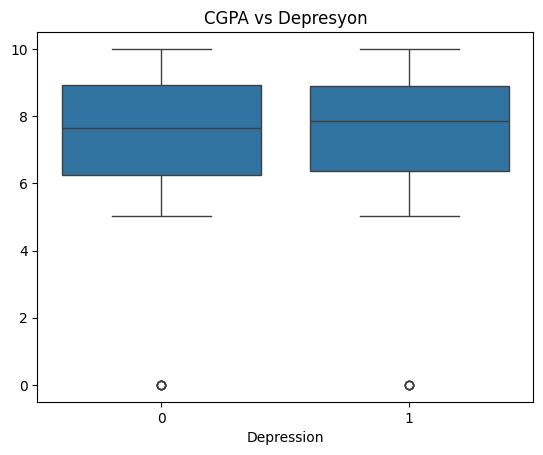

————————————————————————————————————————————————————————————


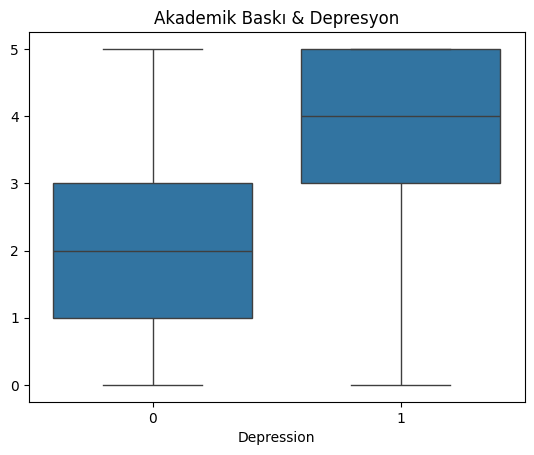

————————————————————————————————————————————————————————————


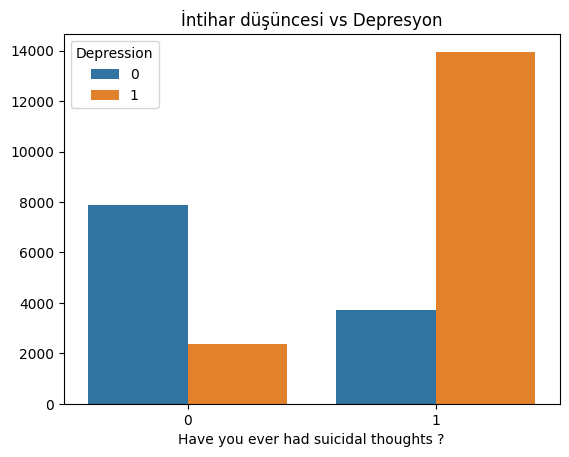

————————————————————————————————————————————————————————————


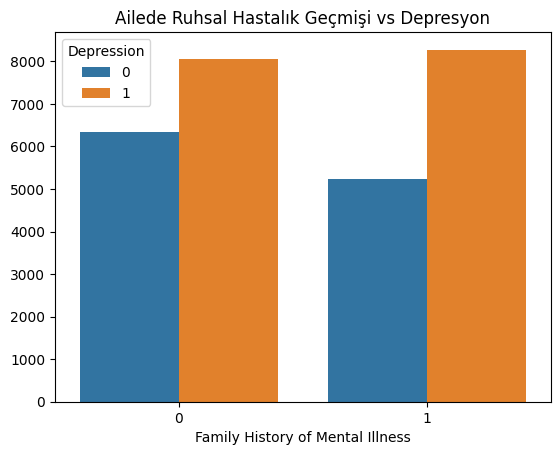

————————————————————————————————————————————————————————————


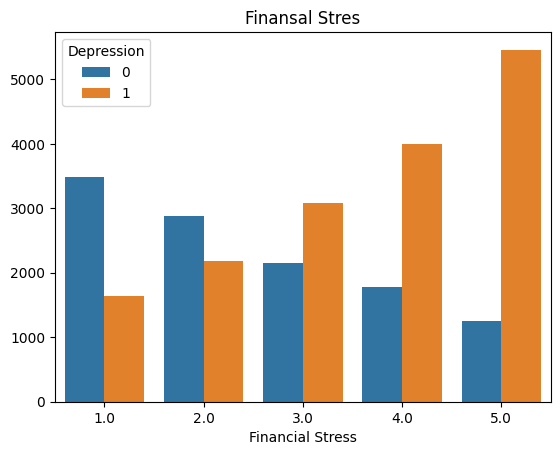

————————————————————————————————————————————————————————————


In [101]:
#Temel özellikleri inceleyelim

# Görselleştirme fonksiyonlarını ve başlıklarını bir listeye alıyoruz
plots = [
    ("Cinsiyet Dağılımı", lambda: df['Gender_Male'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)),
    ("Yaş Dağılımı", lambda: sns.histplot(df['Age'], bins=30, kde=True)),
    ("Depresyon Dağılımı", lambda: sns.countplot(x='Depression', data=df)),
    ("Cinsiyete Göre Depresyon Oranı", lambda: df.groupby('Gender_Male')['Depression'].mean().plot(kind='bar',color='skyblue')),
    ("CGPA vs Depresyon", lambda: sns.boxplot(x='Depression', y='CGPA', data=df)),
    ("Akademik Baskı & Depresyon", lambda: sns.boxplot(x='Depression', y='Academic Pressure', data=df)),
    ("İntihar düşüncesi vs Depresyon", lambda: sns.countplot(x='Have you ever had suicidal thoughts ?', hue='Depression', data=df)),
    ("Ailede Ruhsal Hastalık Geçmişi vs Depresyon", lambda:sns.countplot(x='Family History of Mental Illness', hue='Depression', data=df)),
    ("Finansal Stres", lambda:sns.countplot(x='Financial Stress',hue='Depression',data=df)),
]


# Döngü ile sırayla çizdiriyoruz
for title, plot_func in plots:
    plt.figure()
    plot_func()
    plt.title(title)
    if "pie" not in title:  # Pasta grafikse y-eksenini boş bırak
        plt.ylabel('')
    plt.show()
    print("—" * 60)


### **Grafikleri Yorumlayalım:**

**Cinsiyet Dağılımı Grafiği:**
Grafiği incelediğimizde elimizdeki veri setinde erkeklerin sayıca daha çok olduğunu görüyoruz.

**Yaş Dağılımı:**
Yaşların büyük ölçüde 18-35 yaş aralığında yoğunlaşmış olduğunu ve 20 li yaşların daha çok olduğunu gözlemliyoruz.Grafik öğrenci ve genç yetişkinleri temsil ediyor.

**Depresyon Dağılımı:**
Elimizdeki veri setinde depresyon yaşayanların(1), yaşamayanlara oranla(0) daha fazla olduğunu gördük.

**Cinsiyete Göre Depresyon Oranı:**
Erkek ve kadınlar arasında depresyon oranı çok yakın.Burdan cinsiyetin depresyon üzerinde belirleyiciliği olmadığını gözlemledik.

**CGPA(Not ortalaması) ve Depresyon Oranı:**
Her iki grupta (depresyonlu ve depresyonsuz) CGPA değerleri benzer.
Ancak depresyon yaşayanlarda biraz daha geniş bir dağılım görülüyor.
Not ortalaması (CGPA) depresyonla doğrudan ilişkili değil ama varyans farkı dikkat çekici.

**Akademik Baskı ve Depresyon Oranı:**
Depresyon yaşayan bireylerin akademik baskı seviyeleri belirgin şekilde daha yüksek.

**İntihar Düşüncesi ve Depresyon Oranı:**
İntihar düşüncesi olan insanlarda depresyon görülme olasılığının daha çok olduğunu grafikten gözlemliyoruz.

**Ailede Ruhsal Hastalık Geçmişi vs Depresyon:**
Ailede ruhsal hastalık geçmişi olan bireylerde depresyon oranı daha yüksektir. Geçmişi olmayanlarda da depresyon görülebilir, ancak fark daha az belirgindir.

**Uyku Süresine Göre Depresyon Oranı:**
Uyku süresi az olanların depresyonda olma eğilimleri daha yüksektir.




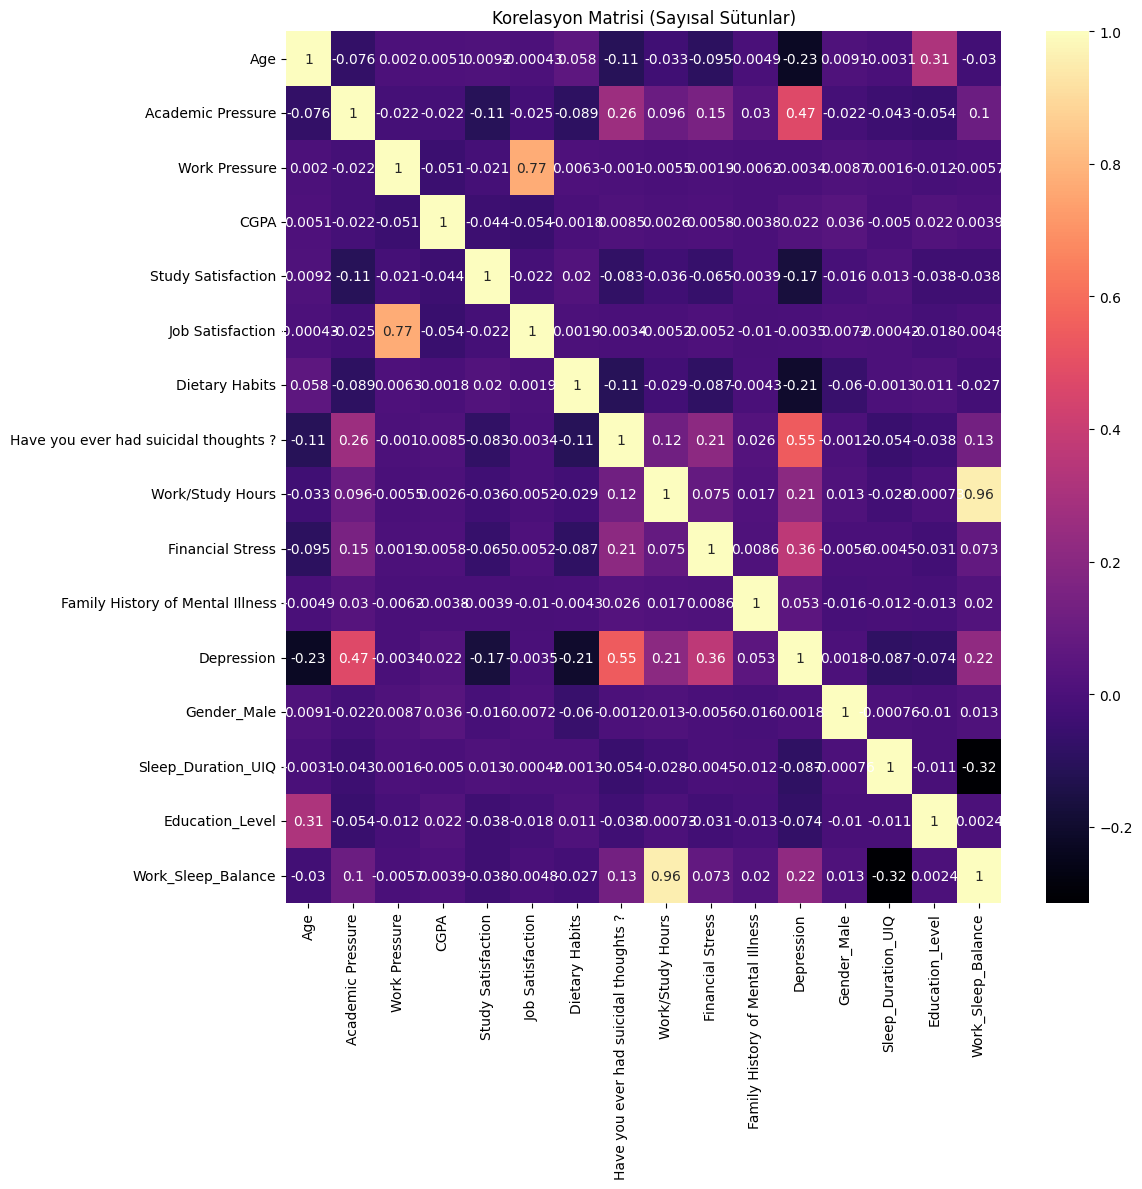

In [102]:
# Korelasyon matrisi çiz
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, cmap='magma')
plt.title("Korelasyon Matrisi (Sayısal Sütunlar)")
plt.tight_layout()
plt.show()

Burdaki amacımız:
Değişkenler arasındaki doğrusal ilişkiyi incelemek.

Depression (Depresyon) değişkeni ile dikkat çeken ilişkiler:

Have you ever had suicidal thoughts? → 0.55 ile pozitif ve güçlü bir ilişki var. Bu beklenen bir sonuç çünkü intihar düşüncesi depresyonun güçlü bir belirtisi olabilir.

Financial Stress → 0.36 ile orta düzeyde pozitif bir ilişki. Maddi stres yaşayan öğrencilerin depresyon riski daha yüksek olabilir.

Academic Pressure → 0.47 ile anlamlı bir pozitif ilişki. Akademik baskı da depresyonu etkileyen önemli bir faktör.

Work Pressure → 0.34 ile yine pozitif bir ilişki var.

Study Satisfaction ve Dietary Habits gibi değişkenlerle ise zayıf negatif ilişkiler gözlemleniyor.

In [103]:
# Özellikler ve hedef
X = df.drop(columns=['Depression', 'Job Satisfaction', 'Work Pressure',"Work_Sleep_Balance"])
y = df["Depression"]

# Train-test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Özellik önem sıralamasında 'Job Satisfaction', 'Work Pressure' etkisi çok düşük olduğu için çıkarttım .

Job Satisfaction'ı genelde 0 (yani memnuniyetsiz) olarak görmüş.

4,5 gibi yüksek bir değer çok uçuk kalıyor ve bu yüzden StandardScaler onu 80
gibi yüksek bir değere dönüştürüyor.

Aynı şekilde Work Pressure.



In [104]:
# StandardScaler'ı da kaydet
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [66]:
# SVM modeli (probability=True ile)
svm_model = SVC(probability=True)  # 🔹 Olasılık tahmini için gerekli
svm_model.fit(X_train_scaled, y_train)

# Tahminler (etiket tahmini)
y_pred_svm = svm_model.predict(X_test_scaled)

# 🔹 Olasılık Tahmini (pozitif sınıf = 1 için)
y_pred_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

# Sonuçlar
print("🔹 Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

print("🔹 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

# 🔹 İlk birkaç kişinin depresyon olasılığını göster (örnek)
for i in range(5):
    print(f"Kişi {i+1}: Depresyon Olasılığı = {y_pred_proba_svm[i]*100:.2f}%")


🔹 Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2343
           1       0.85      0.88      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581

🔹 Confusion Matrix:
[[1822  521]
 [ 395 2843]]
Kişi 1: Depresyon Olasılığı = 7.96%
Kişi 2: Depresyon Olasılığı = 14.60%
Kişi 3: Depresyon Olasılığı = 25.37%
Kişi 4: Depresyon Olasılığı = 88.94%
Kişi 5: Depresyon Olasılığı = 26.12%


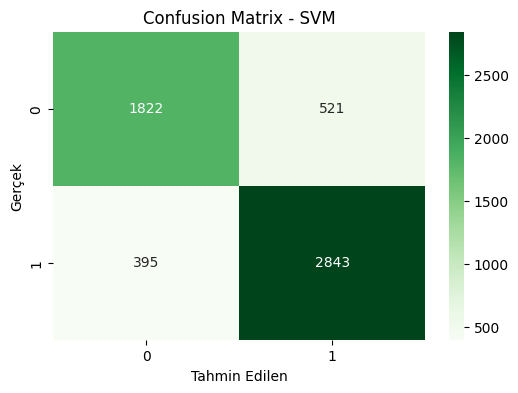

In [67]:
# Confusion matrix'i değişkene ata
cm = confusion_matrix(y_test, y_pred_svm)

# Confusion matrix heatmap'i çiz
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()


Confusion Matrix Açıklaması (Support Vector Machine – SVM Modeli)
True Positive (TP) – 2843 kişi:
Model, gerçekte depresyonda olan bireyleri doğru bir şekilde depresyonda olarak tahmin etmiştir. SVM, depresyonlu bireyleri yüksek başarıyla tespit edebilmiştir.

False Negative (FN) – 395 kişi:
Model, gerçekte depresyonda olan bireyleri yanlışlıkla depresyonda değil olarak tahmin etmiştir. Bu sayı, diğer modellere göre daha düşüktür ve bu da modelin depresyonu atlama oranının daha az olduğunu gösterir.

False Positive (FP) – 513 kişi:
Model, gerçekte depresyonda olmayan bireyleri yanlışlıkla depresyonda olarak tahmin etmiştir. Yanlış alarm oranı diğer modellere göre biraz daha yüksektir.

True Negative (TN) – 1830 kişi:
Model, gerçekte depresyonda olmayan bireyleri doğru bir şekilde depresyonda değil olarak tahmin etmiştir. Bu, SVM’in depresyon olmayan bireyleri belirleme başarısını ortaya koyar.

In [68]:
# Eğitim seti tahmini
y_train_pred = svm_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Test seti tahmini
y_test_pred = svm_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Yorumlama
if train_accuracy - test_accuracy > 0.05:
    print("Model overfitting yapıyor olabilir.")
elif test_accuracy > train_accuracy:
    print("Model regularize edilmiş olabilir veya çok karmaşık değil.")
elif abs(train_accuracy - test_accuracy) < 0.03:
    print("Model dengeli görünüyor.")
else:
    print("Model underfitting yapıyor olabilir.")


Train Accuracy: 0.8588
Test Accuracy: 0.8359
Model dengeli görünüyor.


In [69]:
# Tek bir satırı al
row = X.iloc[2].values.reshape(1, -1)

# Eğer scaler kullandıysan, ölçekle
row_scaled = scaler.transform(row)

# Tahmin yap
prediction = svm_model.predict(row_scaled)

print("Tahmin:", prediction)


Tahmin: [0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Streamlitte sorunlar yaşıyordum bu yüzden burada deneme yaptım.

In [70]:
# Eğitimli Modeli Kaydet (model_svm.pkl)
joblib.dump(svm_model, 'model_svm.pkl')

print("SVM modeli 'model_svm.pkl' olarak başarıyla kaydedildi.")



SVM modeli 'model_svm.pkl' olarak başarıyla kaydedildi.


In [71]:
display(X.head())

,Age,Academic Pressure,CGPA,Study Satisfaction,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Gender_Male,Sleep_Duration_UIQ,Education_Level
0,33.0,5.0,8.97,2.0,1,1,3.0,1.0,0,1,1.0,3
1,24.0,2.0,5.90,5.0,0,0,3.0,2.0,1,0,1.0,3
2,31.0,3.0,7.03,5.0,1,0,9.0,1.0,1,1,0.0,3
3,28.0,3.0,5.59,2.0,0,1,4.0,5.0,1,0,2.0,3
4,25.0,4.0,8.13,3.0,0,1,1.0,1.0,0,0,1.0,2


In [72]:
# Model oluşturma
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    min_samples_split=5,
    class_weight='balanced',
    random_state=42
)

# Modeli eğit
model.fit(X_train, y_train)

# Tahminler
y_pred = model.predict(X_test)

# Değerlendirme
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))




 Accuracy: 0.83049632682315

 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80      2343
           1       0.86      0.84      0.85      3238

    accuracy                           0.83      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.83      0.83      0.83      5581


 Confusion Matrix:
 [[1912  431]
 [ 515 2723]]


                                  Feature  Importance
5   Have you ever had suicidal thoughts ?    0.414657
1                       Academic Pressure    0.260162
7                        Financial Stress    0.130577
0                                     Age    0.059445
6                        Work/Study Hours    0.039677
4                          Dietary Habits    0.034300
3                      Study Satisfaction    0.022960
2                                    CGPA    0.016045
10                     Sleep_Duration_UIQ    0.008586
11                        Education_Level    0.008343
8        Family History of Mental Illness    0.003026
9                             Gender_Male    0.002223


<ipython-input-73-198ea285f364>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


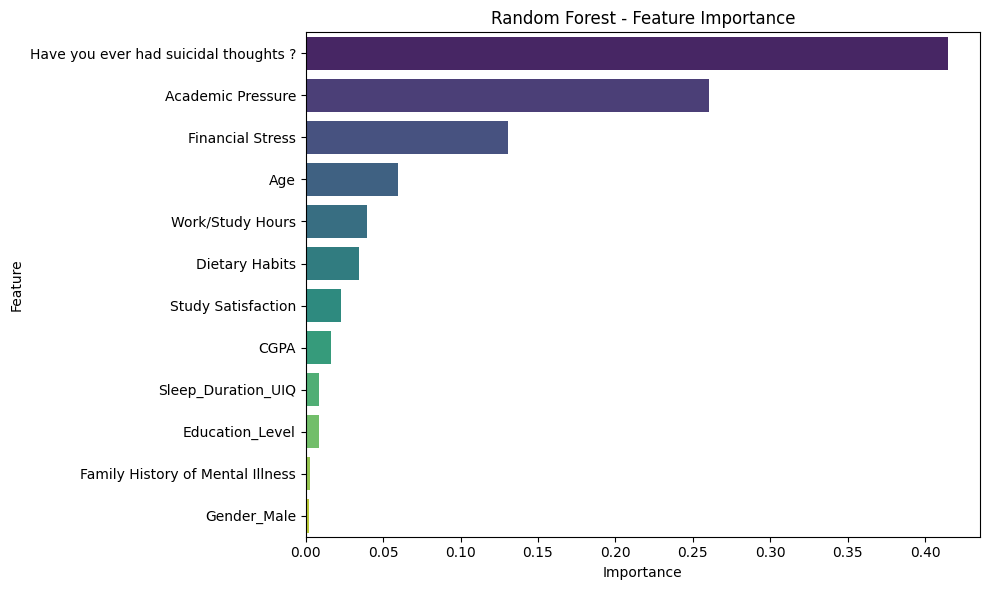

In [73]:
importances = model.feature_importances_
feature_names = X.columns

# DataFrame oluştur
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Önem değerlerine göre azalan sırala
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Yazdır
print(feat_imp_df)

# Grafik çiz
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Random Forest - Feature Importance')
plt.tight_layout()
plt.show()


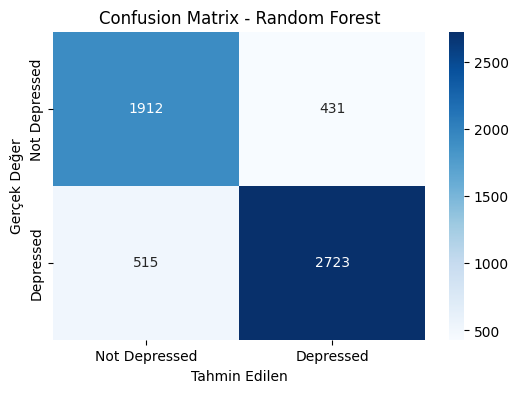

In [74]:
# Confusion matrix oluştur
cm = confusion_matrix(y_test, y_pred)

# Etiketler
labels = ['Not Depressed', 'Depressed']

# Görselleştir
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Confusion Matrix - Random Forest")
plt.show()


2714 (true positive) Model, depresyonda olan bireyleri doğru bir şekilde depresyonda olarak tahmin etmiştir.

524 (false negative) Model, gerçekte depresyonda olan bireyleri yanlışlıkla depresyonda değil olarak tahmin etmiştir. Bu durum, depresyondaki bireylerin gözden kaçırılması anlamına gelir ve kritik bir hatadır.

424 (False Positive) Model, gerçekte depresyonda olmayan bireyleri yanlışlıkla depresyonda olarak tahmin etmiştir. Bu da gereksiz alarm durumudur.

1919 (True Negative)  Model, depresyonda olmayan bireyleri doğru bir şekilde depresyonda değil olarak tahmin etmiştir.

In [75]:
# Logistic Regression modeli
logreg_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg_model.fit(X_train_scaled, y_train)

# Tahminler
y_pred_logreg = logreg_model.predict(X_test_scaled)

# Sonuçlar
print("🔹 Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logreg))

print("🔹 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))


🔹 Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      2343
           1       0.87      0.84      0.85      3238

    accuracy                           0.83      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.83      0.83      5581

🔹 Confusion Matrix:
[[1948  395]
 [ 529 2709]]


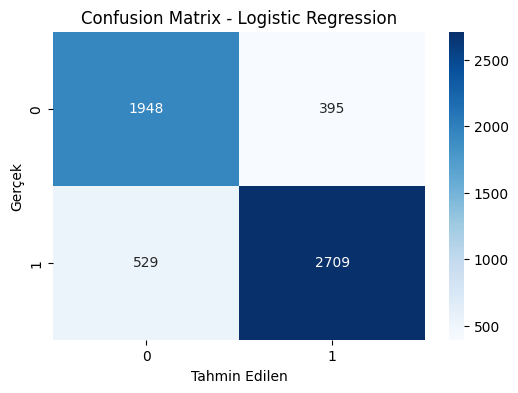

In [76]:
cm = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()


True Positive (TP) – 2709 kişi:
Model, gerçekte depresyonda olan bireyleri doğru bir şekilde depresyonda olarak tahmin etmiştir. Bu durum, modelin depresyonlu bireyleri başarılı bir şekilde tespit ettiğini gösterir.

False Negative (FN) – 529 kişi:
Model, gerçekte depresyonda olan bireyleri yanlışlıkla depresyonda değil olarak tahmin etmiştir. Bu, depresyon gibi önemli bir sağlık sorununda bireylerin gözden kaçırılması anlamına gelir ve önemli bir risk faktörüdür.

False Positive (FP) – 395 kişi:
Model, gerçekte depresyonda olmayan bireyleri yanlışlıkla depresyonda olarak tahmin etmiştir. Bu, yanlış alarm durumudur ve bireylerin gereksiz şekilde psikolojik destek yönlendirmelerine maruz kalmasına yol açabilir.

True Negative (TN) – 1948 kişi:
Model, gerçekte depresyonda olmayan bireyleri doğru bir şekilde depresyonda değil olarak tahmin etmiştir. Modelin bu bireyleri doğru bir şekilde ayırt edebildiğini gösterir.

In [77]:
# KNN modeli (varsayılan k=5)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

# Tahminler
y_pred_knn = knn_model.predict(X_test_scaled)

# Sonuçlar
print("🔹 Classification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

print("🔹 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


🔹 Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      2343
           1       0.83      0.86      0.84      3238

    accuracy                           0.81      5581
   macro avg       0.81      0.81      0.81      5581
weighted avg       0.81      0.81      0.81      5581

🔹 Confusion Matrix:
[[1761  582]
 [ 454 2784]]


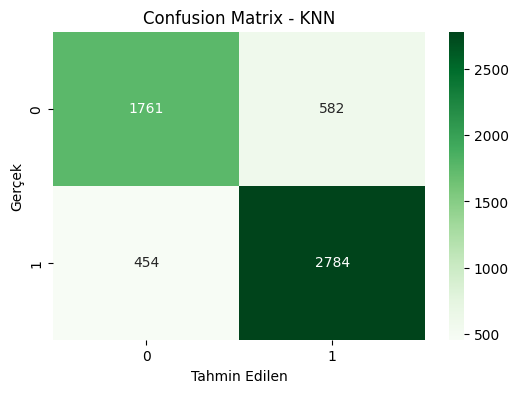

In [78]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()


True Negative (1761): Model, depresyonda olmayan bireyleri doğru bir şekilde depresyonda değil olarak tahmin etti.

False Positive (582): Model, depresyonda olmayan bireyleri yanlışlıkla depresyonda olarak tahmin etti. (Gereksiz alarm)

False Negative (454): Model, depresyonda olan bireyleri depresyonda değil olarak tahmin etti. (Kritik hata – gözden kaçırma)

True Positive (2784): Model, depresyonda olan bireyleri doğru bir şekilde depresyonda olarak tahmin etti.

ROC AUC Değeri: 0.91


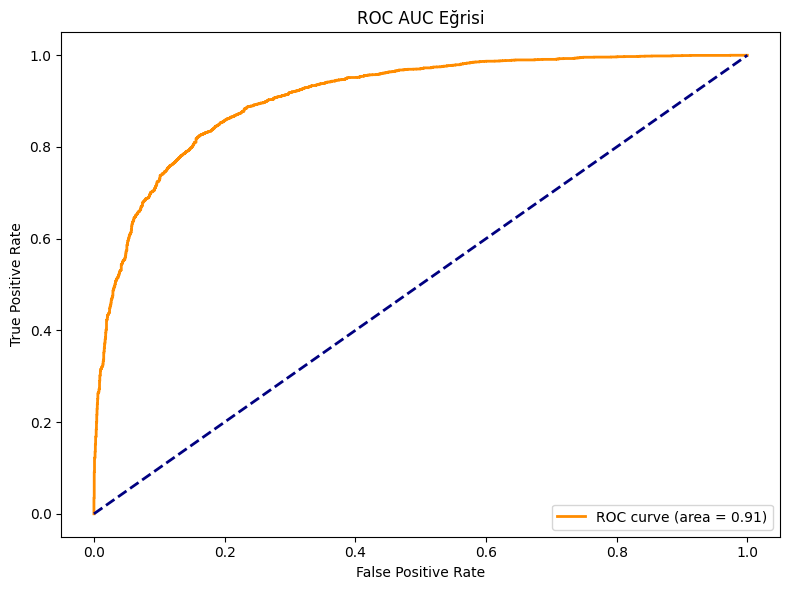

In [79]:
# ROC eğrisi
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# ROC AUC değerini yazdır
print(f"ROC AUC Değeri: {roc_auc:.2f}")

# ROC grafiği çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Eğrisi')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


Burda amacımız sınıflandırma modelinin başarısını ölçmek:
ROC eğrisindeki eğrinin alanı(AUC): 0.91
Bu, modelin çok iyi bir sınıflandırıcı olduğunu gösterir.
Roc eğrisinin sol üst köşeye yakın olması yüksek True Postive ve düşük False Positive oranını sağladığını gösterir.
Modelin depresyonu doğru şekilde tahmin etme ihtimalinin yüksek olduğunu gözlemliyoruz.

In [80]:
!jupyter nbconvert --to script your_notebook_name.ipynb

[NbConvertApp] WARNING | pattern 'your_notebook_name.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--exec